### Урок 11. Домашняя работа

**Задание простого уровня** Мы говорили, что метрики качества нужны, чтобы сравнивать различные модели между собой. В задаче полиномиальной регрессии реализуйте код для выбора лучшей степени полиному:

* возьмите все степени от 1 до 10 по порядку, без пропусков.
* найдите степень полинома, где будет лучший r2-score
* напишите код, который выводит самую подходящую степень полинома и соответствующий ей скор

Эта процедура называется Grid Search и помогает найти лучшие параметры для модели.

Обучите лучшую модель и сделайте predict

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

data = pd.read_csv('non_linear.csv', sep=',')
data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


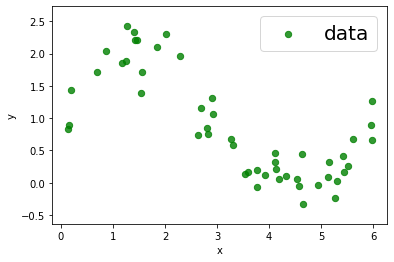

In [2]:
margin = 0.3
plt.scatter(data.x_train, data.y_train, 40, 'g', 'o', alpha=0.8, label='data')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [3]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(data[['x_train']], data['y_train'])
y_hat=reg.predict(data[['x_train']])

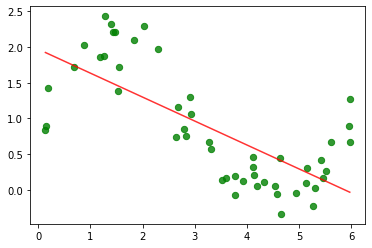

In [4]:
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8)
plt.plot(data['x_train'], y_hat, 'r', alpha=0.8, label='fitted')
plt.show()

In [5]:
def generate_degrees (source_data: list, degree: int):
    return np.array([
        source_data**n for n in range (1, degree +1)
    ]).T

In [6]:
from sklearn.metrics import r2_score
def train_polinomial (degree, data):
    X=generate_degrees(data['x_train'], degree)
    model=LinearRegression().fit(X, data['y_train'])
    y_pred=model.predict(X)
    error=r2_score(data['y_train'], y_pred)
    return y_pred, error

In [31]:
e_pred_best_fit, error_best_fit=train_polinomial(1, data)
i_best_fit=0
for i in range(1,100):
    e_pred, error=train_polinomial(i, data)
    if ((error>0) and (abs(1-error)<abs(1-error_best_fit))):
        e_pred_best_fit=e_pred
        error_best_fit=error
        i_best_fit=i
print (f"Best fit with degree {i_best_fit}, r2 score error is {error_best_fit},\n\
prediced values:\n {e_pred_best_fit}")

Best fit with degree 14, r2 score error is 0.9163974978899938,
prediced values:
 [ 0.73681823  1.05473352  1.36828836  1.66973768  2.10962243  2.08495189
  2.03941527  2.02874066  1.98815704  1.98794229  1.99304818  2.01064329
  2.01776744  2.1220687   2.06951377  1.75653183  1.20884456  1.14813661
  1.0052919   0.97599981  0.87936736  0.86620576  0.53314316  0.49258327
  0.30992609  0.26071817  0.17622097  0.17182596  0.14292894  0.15003686
  0.15003686  0.15198579  0.15810916  0.16051215  0.10858073  0.09481259
  0.07060806  0.06104424 -0.05527661 -0.01412986  0.00426532  0.08182405
  0.12942673  0.24590742  0.28419358  0.36808292  0.53320447  1.01981996
  0.91577257  0.91577257]


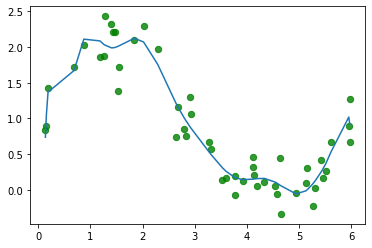

In [32]:
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.plot(data['x_train'], e_pred_best_fit)

**Задание среднего уровня** Напишите класс для обучения модели, который содержит:

* функцию `.fit(X, y)` , которая принимает на вход массив фичей `X`, массив таргетов `y` и обучает коэффициенты регрессии. Код для обучения взять из первого урока модуля *Постановка ML задачи линейной регрессии*
* функцию `.predict(X)`, которая по массиву фичей `X` возвращает массив предсказаний `y`

Нужно использовать код для аналитически вычисляемых коэффициентов. 

Это задание позволит понять, как работает линейная регрессия "внутри" библиотечной реализации.

In [127]:
from matplotlib import pyplot as plt
import numpy as np
from numpy.linalg import inv
from sklearn.datasets import load_boston
boston_dataset=load_boston()
X=boston_dataset.data
y=boston_dataset.target
X=np.insert(X, 0, 1, axis=1)

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
class CustomLinearRegression:
    def __init__(self):
        pass
    def fit(self, X_train, y_train):
        X_T_X=(X_train.T).dot(X_train)
        X_T_X_Inverted=inv(X_T_X)
        w=X_T_X_Inverted.dot(X_train.T).dot(y_train)
        self.__w=w
    def predict (self, X_test):
        w=self.__w
        predict=X_test*w.T
        l=list()
        for i in range(0, len(predict)):
            l.append(round(predict[i].sum(),2))
        y_predict=np.array(l)
        return (y_predict)
    def get_w(self):
        return self.__w

In [130]:
reg=CustomLinearRegression()
reg.fit(X_train, y_train)
y_predict=reg.predict (X_test)
X=y_predict.reshape(-1,1)
X=np.insert(X, 0, 1, axis=1)
reg.fit(X, y_test)
reg.get_w()

array([2.98737694, 0.87053625])

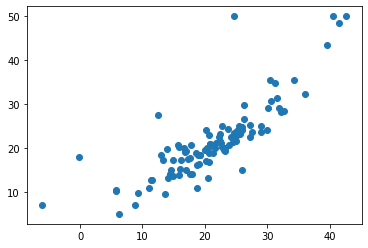

<Figure size 1440x1440 with 0 Axes>

In [131]:
plt.scatter(y_predict, y_test)
plt.figure(figsize=(20, 20))
plt.show()

**Задание высокого уровня**

1. разделите датасет с домами Бостона из Урока 2 (таргет и фичи) на две части: в одной части 80% датасета (назовём train) в другой 20% (назовём valid) с помощью функции `train_test_split` из библиотеки `sklearn`
1. обучите модель только на train датасете
1. постройте предсказания valid датасете
1. Посчитайте  `r2 score` на валидационном сете

После этого примените к обеим датасетам z-преобразование и повторите шаги 2-4. Как изменилась метрика r2?

Это задание поможет понять, как валидировать линейную регрессию (и другие модели) на отложенной выборке.

In [139]:
from sklearn.datasets import load_boston
boston_dataset=load_boston()
X=boston_dataset.data
y=boston_dataset.target
X=np.insert(X, 0, 1, axis=1)

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [145]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(X_train, y_train)
# print(reg.coef_)
y_predict=reg.predict(X_test)

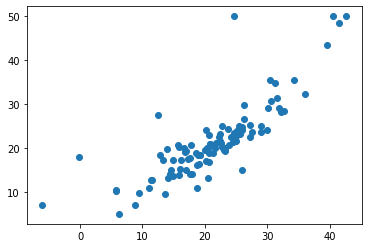

<Figure size 1440x1440 with 0 Axes>

In [146]:
plt.scatter(y_predict, y_test)
plt.figure(figsize=(20, 20))
plt.show()